In [2]:
# Configure Autoreload
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys

# Add parent directory to system path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from itertools import count, islice

import graphblas_algorithms as blas
import networkx as nx
import numpy as np

from algorithms import *

import graph.graph_db as graph_db
import synthesis.edge_addition_generator as eag
import synthesis.graph_generator as graph_generator
import synthesis.weight_generator as weight_generator
from algorithms.ga import GeneticSolver
from algorithms.greedy import GreedySolver
from algorithms.sa import SimulatedAnnealingSolver
from algorithms.montecarlo import MonteCarloSolver
from algorithms.optimalstructure import OptimalStructureSolver
from algorithms.solver import ProblemTooBigException
from graph import EdgeSet, dynamic_aspl, model
from synthesis.problem_generator import generate_problem
from graph import dynamic_aspl
from synthesis.weight_generator import MetaWeighter
from itertools import islice, count
from synthesis.combinations import find_closest_nCr

In [4]:
maximum_time = 60
solvers = [
    ExhuastiveSolver(maximum_time=60),
    GreedySolver(),
    #MonteCarloSolver(maximum_iterations=100000, maximum_time=maximum_time, repititions=5),
    #SimulatedAnnealingSolver(maximum_time=maximum_time, maximum_iterations=100000, repititions=5, initial_temperature=1000, minimum_temperature=1, annealing_schedule='adaptive'),
    #SimulatedAnnealingSolver(maximum_time=maximum_time, maximum_iterations=100000, repititions=5, initial_temperature=1000, minimum_temperature=1, annealing_schedule='exponential'),
    GeneticSolver(repititions=5, population_size=200, maximum_time=maximum_time, maximum_iterations=500, creature_mutation_rate=0.1, gene_mutation_rate=0.1, selection_method='ranking'),
    GeneticSolver(repititions=5, population_size=200, maximum_time=maximum_time, maximum_iterations=500, creature_mutation_rate=0.1, gene_mutation_rate=0.1, selection_method='roulette'),
]

problem_classes = [{
    'graph': graph_generator.WattsStrogatzGraph(n=50, k=2, p=0.3),
    'weighter': weight_generator.GaussianWeighter(mu=100, sigma=50),
    'N': int(1e6),
    'S_degree_max': 100
}]

with graph_db.open('../data/graph.db') as db:
    for pc in problem_classes:
        for i in range(5):
            # Unpack the problem variables into local variable scope
            graph, weighter, N, S_degree_max = [pc[k] for k in ['graph', 'weighter', 'N', 'S_degree_max']]
            G = next(graph)
            weighter.weight_graph(G)
            S_degree_max = min(len(list(nx.non_edges(G))), S_degree_max)
            S_degree, k = find_closest_nCr(N, S_degree_max)
            problem = generate_problem(G, k, S_degree)
            db.write_problem(problem)
            for solver in solvers:
                try:
                    for sln in solver.solve(problem):
                        print(sln)
                        db.write_solution(sln)
                except ProblemTooBigException:
                    print(f"Skipping Solver {solver} as problem too large")
                    continue

Updating Graph id 73


Exhaustive Solver: 100%|██████████| 971635/971635 [00:41<00:00, 23492.24it/s, best_aspl=481.5992346938776, aspl=581.4136734693877, solutions_explored=971635] 


Solution generated by 'Exhaustive Solver' with 4 edges and ASPL 481.5992346938776
Setting lower bound to  481.5992346938776


Greedy Solver: 100%|██████████| 4/4 [00:00<00:00, 911.81it/s]


Solution generated by 'Greedy Solver' with 4 edges and ASPL 481.5992346938776
Setting lower bound to  481.5992346938776


Genetic Solver:  24%|██▍       | 122/500 [00:01<00:04, 93.24it/s, best_aspl=481.59924, aspl=485.41208, solutions_explored=1718]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 481.5992431640625


Genetic Solver:  32%|███▏      | 160/500 [00:01<00:03, 96.54it/s, best_aspl=481.59924, aspl=483.16907, solutions_explored=2146]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 481.5992431640625


Genetic Solver:   6%|▌         | 29/500 [00:00<00:04, 98.44it/s, best_aspl=481.59924, aspl=483.16907, solutions_explored=1774]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 481.5992431640625


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 95.96it/s, best_aspl=490.21918, aspl=491.096, solutions_explored=2753] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 490.21917724609375


Genetic Solver:   3%|▎         | 14/500 [00:00<00:05, 89.84it/s, best_aspl=481.59924, aspl=495.65387, solutions_explored=1431]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 481.5992431640625
Setting lower bound to  481.5992346938776


Genetic Solver:  81%|████████  | 403/500 [00:04<00:01, 86.99it/s, best_aspl=481.59924, aspl=506.2026, solutions_explored=15626] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 481.5992431640625


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 90.80it/s, best_aspl=486.61032, aspl=551.7725, solutions_explored=21862] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 486.6103210449219


Genetic Solver:  91%|█████████ | 454/500 [00:04<00:00, 94.13it/s, best_aspl=481.59924, aspl=535.40533, solutions_explored=15941]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 481.5992431640625


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 93.90it/s, best_aspl=483.16913, aspl=526.50574, solutions_explored=15024]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 483.16912841796875


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 93.17it/s, best_aspl=484.88797, aspl=502.87714, solutions_explored=12270]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 484.8879699707031
Updating Graph id 74


Exhaustive Solver: 100%|██████████| 971635/971635 [00:40<00:00, 24087.38it/s, best_aspl=496.60030612244896, aspl=741.399693877551, solutions_explored=971635] 


Solution generated by 'Exhaustive Solver' with 4 edges and ASPL 496.60030612244896
Setting lower bound to  496.60030612244896


Greedy Solver: 100%|██████████| 4/4 [00:00<00:00, 1018.28it/s]


Solution generated by 'Greedy Solver' with 4 edges and ASPL 496.60030612244896
Setting lower bound to  496.60030612244896


Genetic Solver:   3%|▎         | 16/500 [00:00<00:07, 67.00it/s, best_aspl=496.6003, aspl=508.2499, solutions_explored=1775]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 496.6003112792969


Genetic Solver:   2%|▏         | 11/500 [00:00<00:05, 91.32it/s, best_aspl=496.6003, aspl=544.355, solutions_explored=1618]  


Solution generated by 'Genetic Solver' with 4 edges and ASPL 496.6003112792969


Genetic Solver:   4%|▎         | 18/500 [00:00<00:05, 94.00it/s, best_aspl=496.6003, aspl=506.33356, solutions_explored=1850] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 496.6003112792969


Genetic Solver:   2%|▏         | 8/500 [00:00<00:05, 97.75it/s, best_aspl=496.6003, aspl=617.4364, solutions_explored=1347]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 496.6003112792969


Genetic Solver:   2%|▏         | 10/500 [00:00<00:05, 93.76it/s, best_aspl=496.6003, aspl=592.1681, solutions_explored=1639]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 496.6003112792969
Setting lower bound to  496.60030612244896


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 94.89it/s, best_aspl=499.86838, aspl=518.84064, solutions_explored=10628] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 499.8683776855469


Genetic Solver:  44%|████▍     | 222/500 [00:02<00:03, 87.15it/s, best_aspl=496.6003, aspl=593.66187, solutions_explored=8386]  


Solution generated by 'Genetic Solver' with 4 edges and ASPL 496.6003112792969


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 99.94it/s, best_aspl=508.00507, aspl=548.2608, solutions_explored=13193]  


Solution generated by 'Genetic Solver' with 4 edges and ASPL 508.00506591796875


Genetic Solver:  22%|██▏       | 110/500 [00:01<00:04, 92.27it/s, best_aspl=496.6003, aspl=515.59235, solutions_explored=6537] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 496.6003112792969


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 97.32it/s, best_aspl=508.2499, aspl=531.6417, solutions_explored=14550]   


Solution generated by 'Genetic Solver' with 4 edges and ASPL 508.2499084472656
Updating Graph id 75


Exhaustive Solver: 100%|██████████| 971635/971635 [00:39<00:00, 24694.41it/s, best_aspl=555.7238775510205, aspl=759.244387755102, solutions_explored=971635]  


Solution generated by 'Exhaustive Solver' with 4 edges and ASPL 555.7238775510205
Setting lower bound to  555.7238775510205


Greedy Solver: 100%|██████████| 4/4 [00:00<00:00, 963.10it/s]


Solution generated by 'Greedy Solver' with 4 edges and ASPL 576.3466326530612
Setting lower bound to  555.7238775510205


Genetic Solver: 100%|██████████| 500/500 [00:04<00:00, 102.74it/s, best_aspl=572.0318, aspl=572.0318, solutions_explored=2945]  


Solution generated by 'Genetic Solver' with 4 edges and ASPL 572.0317993164062


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 96.61it/s, best_aspl=564.09186, aspl=564.09186, solutions_explored=3205] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 564.0918579101562


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 99.63it/s, best_aspl=564.09186, aspl=564.09186, solutions_explored=3077] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 564.0918579101562


Genetic Solver: 100%|██████████| 500/500 [00:04<00:00, 100.27it/s, best_aspl=564.09186, aspl=564.09186, solutions_explored=3344]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 564.0918579101562


Genetic Solver: 100%|██████████| 500/500 [00:04<00:00, 103.75it/s, best_aspl=559.4846, aspl=559.4846, solutions_explored=2969] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 559.484619140625
Setting lower bound to  555.7238775510205


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 98.66it/s, best_aspl=574.34735, aspl=603.38715, solutions_explored=13616] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 574.3473510742188


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 96.40it/s, best_aspl=576.23315, aspl=606.7017, solutions_explored=10265]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 576.233154296875


Genetic Solver:  11%|█         | 54/500 [00:00<00:04, 93.64it/s, best_aspl=555.7239, aspl=737.67816, solutions_explored=6695] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 555.723876953125


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 96.84it/s, best_aspl=559.4846, aspl=631.3121, solutions_explored=11502]  


Solution generated by 'Genetic Solver' with 4 edges and ASPL 559.484619140625


Genetic Solver: 100%|██████████| 500/500 [00:04<00:00, 104.01it/s, best_aspl=559.4846, aspl=613.50256, solutions_explored=11996]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 559.484619140625
Updating Graph id 76


Exhaustive Solver: 100%|██████████| 971635/971635 [00:39<00:00, 24664.90it/s, best_aspl=510.8430612244898, aspl=725.8685714285714, solutions_explored=971635] 


Solution generated by 'Exhaustive Solver' with 4 edges and ASPL 510.8430612244898
Setting lower bound to  510.8430612244898


Greedy Solver: 100%|██████████| 4/4 [00:00<00:00, 1021.13it/s]


Solution generated by 'Greedy Solver' with 4 edges and ASPL 527.8312755102041
Setting lower bound to  510.8430612244898


Genetic Solver:   2%|▏         | 12/500 [00:00<00:05, 88.77it/s, best_aspl=510.84305, aspl=583.2341, solutions_explored=1867]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 510.8430480957031


Genetic Solver:  23%|██▎       | 115/500 [00:01<00:03, 104.72it/s, best_aspl=510.84305, aspl=511.90775, solutions_explored=2550]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 510.8430480957031


Genetic Solver:   3%|▎         | 14/500 [00:00<00:04, 101.26it/s, best_aspl=510.84305, aspl=529.3671, solutions_explored=1816]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 510.8430480957031


Genetic Solver:   2%|▏         | 12/500 [00:00<00:20, 24.30it/s, best_aspl=510.84305, aspl=604.6702, solutions_explored=2064]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 510.8430480957031


Genetic Solver:   2%|▏         | 11/500 [00:00<00:04, 101.24it/s, best_aspl=510.84305, aspl=629.5348, solutions_explored=1902]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 510.8430480957031
Setting lower bound to  510.8430612244898


Genetic Solver: 100%|██████████| 500/500 [00:04<00:00, 100.17it/s, best_aspl=533.2646, aspl=572.23303, solutions_explored=11910]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 533.2645874023438


Genetic Solver: 100%|██████████| 500/500 [00:04<00:00, 100.34it/s, best_aspl=527.8313, aspl=587.73773, solutions_explored=12555]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 527.831298828125


Genetic Solver: 100%|██████████| 500/500 [00:04<00:00, 100.76it/s, best_aspl=527.8313, aspl=727.5265, solutions_explored=11925] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 527.831298828125


Genetic Solver: 100%|██████████| 500/500 [00:04<00:00, 101.31it/s, best_aspl=530.0284, aspl=604.522, solutions_explored=11871]  


Solution generated by 'Genetic Solver' with 4 edges and ASPL 530.0283813476562


Genetic Solver: 100%|██████████| 500/500 [00:05<00:00, 98.67it/s, best_aspl=512.2662, aspl=651.683, solutions_explored=14028]   


Solution generated by 'Genetic Solver' with 4 edges and ASPL 512.2661743164062
Updating Graph id 77


Exhaustive Solver: 100%|██████████| 971635/971635 [00:38<00:00, 25153.46it/s, best_aspl=450.31479591836734, aspl=692.859387755102, solutions_explored=971635] 


Solution generated by 'Exhaustive Solver' with 4 edges and ASPL 450.31479591836734
Setting lower bound to  450.31479591836734


Greedy Solver: 100%|██████████| 4/4 [00:00<00:00, 1040.83it/s]


Solution generated by 'Greedy Solver' with 4 edges and ASPL 483.0307142857143
Setting lower bound to  450.31479591836734


Genetic Solver: 100%|██████████| 500/500 [00:04<00:00, 103.88it/s, best_aspl=451.74582, aspl=451.74582, solutions_explored=2281]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 451.7458190917969


Genetic Solver:   2%|▏         | 10/500 [00:00<00:04, 102.11it/s, best_aspl=450.3148, aspl=498.49673, solutions_explored=1715]


Solution generated by 'Genetic Solver' with 4 edges and ASPL 450.3147888183594


Genetic Solver:  40%|████      | 202/500 [00:02<00:03, 94.25it/s, best_aspl=450.3148, aspl=456.55295, solutions_explored=2620]  


Solution generated by 'Genetic Solver' with 4 edges and ASPL 450.3147888183594


Genetic Solver:   2%|▏         | 12/500 [00:00<00:04, 101.78it/s, best_aspl=450.3148, aspl=492.95703, solutions_explored=1673] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 450.3147888183594


Genetic Solver:  25%|██▌       | 125/500 [00:01<00:03, 105.85it/s, best_aspl=450.3148, aspl=456.55295, solutions_explored=2111] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 450.3147888183594
Setting lower bound to  450.31479591836734


Genetic Solver:  11%|█         | 53/500 [00:00<00:04, 102.20it/s, best_aspl=450.3148, aspl=498.15347, solutions_explored=5936] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 450.3147888183594


Genetic Solver:  29%|██▉       | 145/500 [00:01<00:03, 94.79it/s, best_aspl=450.3148, aspl=540.68, solutions_explored=8122]    


Solution generated by 'Genetic Solver' with 4 edges and ASPL 450.3147888183594


Genetic Solver:  13%|█▎        | 65/500 [00:00<00:04, 101.14it/s, best_aspl=450.3148, aspl=576.697, solutions_explored=7409]   


Solution generated by 'Genetic Solver' with 4 edges and ASPL 450.3147888183594


Genetic Solver:  29%|██▉       | 146/500 [00:01<00:03, 103.74it/s, best_aspl=450.3148, aspl=467.77505, solutions_explored=7316] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 450.3147888183594


Genetic Solver:  21%|██▏       | 107/500 [00:01<00:04, 98.14it/s, best_aspl=450.3148, aspl=522.74634, solutions_explored=6960] 


Solution generated by 'Genetic Solver' with 4 edges and ASPL 450.3147888183594


In [6]:
db = 


In [23]:
# Open the database and read all problems
with graph_db.open('../data/graph.db') as db:
    problems = list(db.read_problems())

In [26]:
combined_traces = []
for solution in problems[-2].solutions:
    for i, trace_step in enumerate(solution.trace):
        combined_traces.append(dict(
            method=solution.method,
            iteration=i,
            aspl=trace_step['aspl'],
            solutions_explored = trace_step['solutions_explored']
            )
        )

In [30]:
problems[-2].solutions[-1].trace

[{'best_aspl': 132.7254638671875,
  'aspl': 132.7254638671875,
  'solutions_explored': 1},
 {'best_aspl': 132.7254638671875,
  'aspl': 133.2452850341797,
  'solutions_explored': 2},
 {'best_aspl': 99.01055908203125,
  'aspl': 99.01055908203125,
  'solutions_explored': 3},
 {'best_aspl': 99.01055908203125,
  'aspl': 146.48985290527344,
  'solutions_explored': 4},
 {'best_aspl': 99.01055908203125,
  'aspl': 124.9630126953125,
  'solutions_explored': 5},
 {'best_aspl': 99.01055908203125,
  'aspl': 105.00753784179688,
  'solutions_explored': 6},
 {'best_aspl': 85.25374603271484,
  'aspl': 85.25374603271484,
  'solutions_explored': 7},
 {'best_aspl': 85.25374603271484,
  'aspl': 124.33108520507812,
  'solutions_explored': 8},
 {'best_aspl': 85.25374603271484,
  'aspl': 145.1966094970703,
  'solutions_explored': 9},
 {'best_aspl': 85.25374603271484,
  'aspl': 169.9081573486328,
  'solutions_explored': 10},
 {'best_aspl': 85.25374603271484,
  'aspl': 132.45355224609375,
  'solutions_explored'

In [27]:
combined_traces

[{'method': 'Greedy Solver',
  'iteration': 0,
  'aspl': 70.46102430555555,
  'solutions_explored': 1},
 {'method': 'Greedy Solver',
  'iteration': 0,
  'aspl': 70.46102430555555,
  'solutions_explored': 1},
 {'method': 'Exhaustive Solver',
  'iteration': 0,
  'aspl': 128.88683810763888,
  'solutions_explored': 1},
 {'method': 'Exhaustive Solver',
  'iteration': 1,
  'aspl': 127.61800130208333,
  'solutions_explored': 2},
 {'method': 'Exhaustive Solver',
  'iteration': 2,
  'aspl': 126.02715928819444,
  'solutions_explored': 3},
 {'method': 'Exhaustive Solver',
  'iteration': 3,
  'aspl': 140.29967447916667,
  'solutions_explored': 4},
 {'method': 'Exhaustive Solver',
  'iteration': 4,
  'aspl': 142.14279513888889,
  'solutions_explored': 5},
 {'method': 'Exhaustive Solver',
  'iteration': 5,
  'aspl': 116.75092230902777,
  'solutions_explored': 6},
 {'method': 'Exhaustive Solver',
  'iteration': 6,
  'aspl': 129.62811414930556,
  'solutions_explored': 7},
 {'method': 'Exhaustive Solve

In [18]:
import pandas as pd
df = pd.DataFrame.from_records(combined_traces)
df_pivot = df.pivot(index='iteration', columns='method', values='aspl')

ValueError: Index contains duplicate entries, cannot reshape

<Axes: >

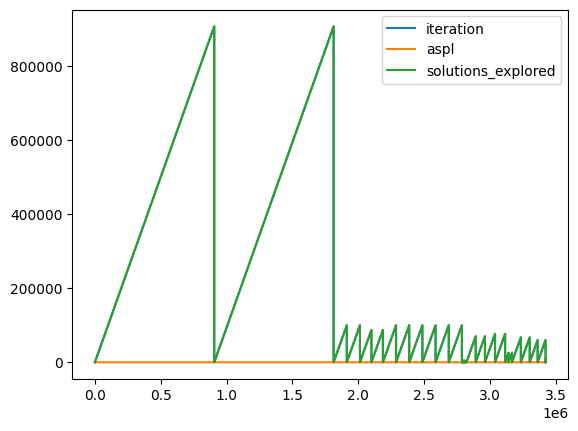

In [17]:
df.plot()

<Axes: >

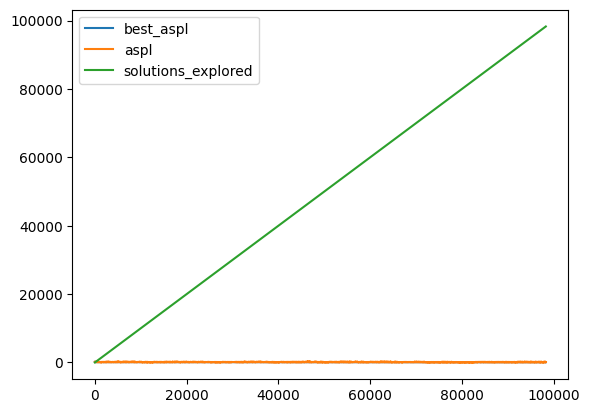

In [ ]:
import pandas as pd
pd.DataFrame.from_dict(p.solutions[2].trace).plot()

In [ ]:
print(db.read_graph(5))

Graph named 'WattsStrogatzGraph' with 0 nodes and 0 edges


In [ ]:
G

In [ ]:
import graphblas_algorithms as ga
g2 = ga.Graph.from_networkx(G, weight='weight')

In [ ]:
g2.matrix[(0,2)] = 10
z = g2.matrix[(2,0)]
g2.matrix[(2,0)] = z

In [ ]:
import graphblas as gb
ga.floyd_warshall(g2, is_weighted=True).reduce_scalar(gb.monoid.plus).value

24847710.926685773

gb.ScalarIndexExpr  dtype
M_565[2, 0]          FP64

"Result"   value  dtype
gb.Scalar   10.0   FP64

This expression may be used to extract or assign a Scalar.
Example extract: M_565[2, 0].new()
Example assign: M_565[2, 0] << s

In [ ]:
from graph import dynamic_aspl
oracle = dynamic_aspl.PartiallyDynamicAllPairsShortestPaths(G)
print(oracle.aspl)
for i in range(20):
    aspl = oracle.evaluate_edges([(11,10,1)])
    print(aspl)

11878.689057057058
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716
11878.060716716716


In [ ]:
solvers = [
    ExhuastiveSolver(maximum_time=2),
    #SimulatedAnnealingSolver(maximum_iterations=2000, initial_temperature=100, cooling_rate=0.999),
    #GeneticSolver(population_size=100),
    #GreedySolver()
]

with graph_db.GraphDB('../graph.db') as db:
    for G in graph_generator.RandomGraphGenerator(n = TruncatedExponential(100, 10, 400), weighter=MetaWeighter):
        for problem in islice(generate_problems(G, S_degree_max=100, N_max=1e5), 5):
            print("Next problem:", problem)
            for solver in solvers:
                solution = solver.solve(problem)
                problem.add_solution(solution)
                db.write_problem(problem)



NameError: name 'TruncatedExponential' is not defined

KeyboardInterrupt: 

In [ ]:
from synthesis.weight_generator import Weighter
w = MetaWeighter
isinstance(w, Weighter)

False

In [ ]:
type(w)

NoneType

In [ ]:
dir(greedy)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_best_aspl',
 '_current_iteration',
 '_current_problem',
 '_current_trace',
 '_pbar',
 '_start_time',
 'algorithm',
 'expected_iterations',
 'initialise',
 'is_optimal',
 'iterator',
 'method_name',
 'solve',
 'trace',
 'verbose']

<class 'synthesis.weight_generator.ConstantWeighter'> Graph named 'WattsStrogatz' with 13 nodes and 13 edges


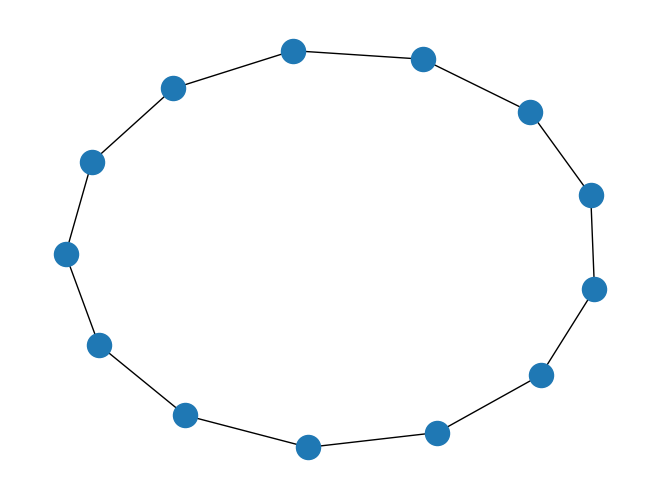

In [ ]:
nx.draw(next(G))

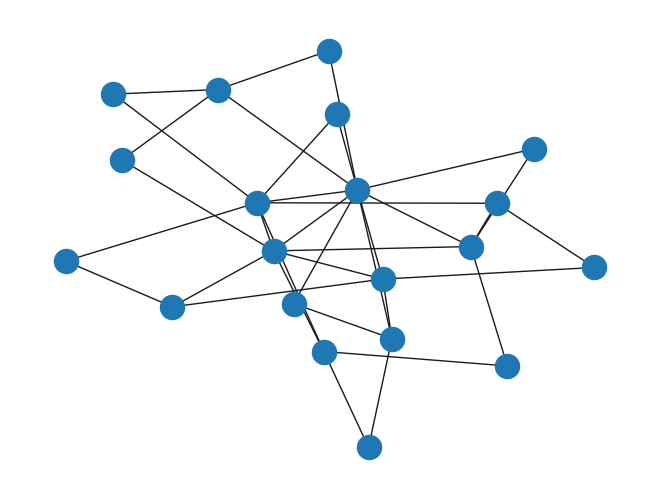

In [ ]:
#nx.draw(nx.binomial_tree(4))

nx.draw(G)

In [ ]:
import math, pandas as pd
nCr = [{'n':n, 'r':r, 'nCr': math.comb(n,r)} for n,r in itertools.product(range(3,1000,5), range(2,1000,5))]

ValueError: `legend` must be 'auto', 'brief', 'full', or a boolean.

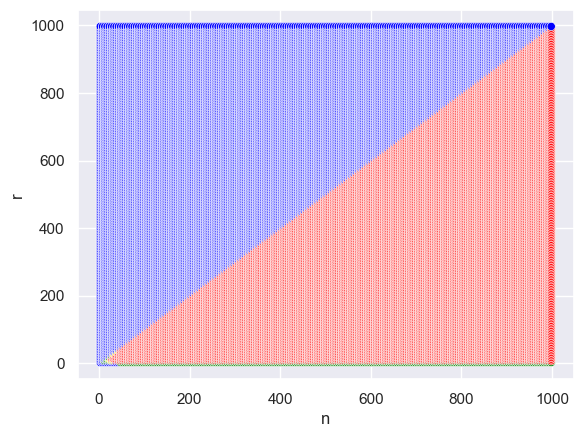

In [ ]:
df = pd.DataFrame(nCr)
# Create a contour plot of df with manual hue mappings
import matplotlib.colors as mcolors
import seaborn  as sns

# Define the boundaries and colors for the hue mappings
boundaries = [0, 1000, 1000000, 10000000, 100000000]
colors = ['blue', 'green', 'yellow', 'red']

# Create a BoundaryNorm object
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(boundaries, cmap.N, clip=True)
#norm = mcolors.LogNorm()

# Plot the dataframe with manual hue mappings
#sns.scatterplot(data=df, x='n', y='r', hue='nCr', legend='brief', hue_norm=norm, palette=cmap)
sns.scatterplot(data=df, x='n', y='r', hue='nCr', legend='none', hue_norm=norm, palette=cmap)




In [ ]:
df['n-r'] = df['r'] - df['n']

In [ ]:
df

,n,r,nCr,n-r
0,3,2,3,-1
1,3,3,1,0
2,3,4,0,1
3,3,5,0,2
4,3,6,0,3
...,...,...,...,...
39001,199,195,63391251,-4
39002,199,196,1293699,-3
39003,199,197,19701,-2
39004,199,198,199,-1


In [ ]:
df[['n-r', 'nCr']]

,n-r,nCr
0,-1,3
1,0,1
2,1,0
3,2,0
4,3,0
...,...,...
39001,-4,63391251
39002,-3,1293699
39003,-2,19701
39004,-1,199


In [ ]:
db = graph_db.GraphDB('../graph.db')
db.as_dataframe()

,GRAPH_ID,graph_aspl,N,M,NAME,graph_class,GENERATION_METHOD,PROBLEM_ID,K,DEGREE_S,GENERATION_METHOD,solution_aspl,RUN_TIME,IS_OPTIMAL,solution_method
0,1,1323.063639,200,396,BarabasiAlbertGraph,BarabasiAlbertGraph,None,2.0,2.0,None,None,None,NaN,NaN,None
1,1,1323.063639,200,396,BarabasiAlbertGraph,BarabasiAlbertGraph,None,52.0,2.0,None,None,2.300408,6.526388,1.0,Brute Force Solver
2,2,133.581430,200,4200,WattsStrogatz,WattsStrogatz,None,3.0,2.0,None,None,None,NaN,NaN,None
3,2,133.581430,200,4200,WattsStrogatz,WattsStrogatz,None,53.0,2.0,None,None,None,NaN,NaN,None
4,3,1008.576253,200,1600,WattsStrogatz,WattsStrogatz,None,1.0,2.0,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,1118,114.229156,50,100,WattsStrogatz,WattsStrogatz,None,1844.0,5.0,None,None,b'\xef\xe3\xbbB',18.838228,0.0,Genetic Solver
2518,1118,114.229156,50,100,WattsStrogatz,WattsStrogatz,None,1844.0,5.0,None,None,93.945185,0.014943,0.0,Greedy Solver
2519,1118,114.229156,50,100,WattsStrogatz,WattsStrogatz,None,1842.0,6.0,None,None,92.22567,120.007752,1.0,Brute Force Solver (With Oracle)
2520,1118,114.229156,50,100,WattsStrogatz,WattsStrogatz,None,1842.0,6.0,None,None,b'g\xe2\xb5B',22.159573,0.0,Genetic Solver


In [ ]:
from algorithms.ga import GeneticSolver
from algorithms.greedy import GreedySolver

In [ ]:
import graph.dynamic_aspl
from algorithms.ga import GeneticSolver
#graph.dynamic_aspl.PartiallyDynamicAllPairsShortestPaths.VERIFY = True

from algorithms.greedy import GreedySolver
weighter = weight_generator.UniformWeighter(1,100)
#weighter = weight_generator.ConstantWeighter(2.0)

#print(nx.average_shortest_path_length(G, weight='weight'))
#problem = eag.generate_problem_with_solution(G, k = 10, S_degree=20, weighter = weighter)
#print(nx.average_shortest_path_length(G, weight='weight'))
ga = GeneticSolver(population_size=1000, maximum_iterations=200)
bf = bruteforce.BruteForceOracleSolver()
greedy = GreedySolver(maximum_iterations=1000)

In [ ]:
from synthesis.problem_generator import generate_problems

In [ ]:
#import graph.test as test
from itertools import islice, count
interesting_problems = []
with graph_db.GraphDB('../graph.db') as db:
    for G in graph_generator.RandomGraphGenerator(50):
        G = weighter.weight_graph(G)
        for problem in islice(generate_problems(G, weighter, N_domain=[100, 20000000]),10):
            print(problem)
            greedy_sln = greedy.solve(problem)
            bf_sln = bf.solve(problem)
            ga_sln = ga.solve(problem)

            problem.add_solution(bf_sln)
            problem.add_solution(greedy_sln)
            db.write_problem(problem)
            #print('Experimenting with problem', test.greedy_bounds(problem))
            if (delta := abs(bf_sln.aspl - greedy_sln.aspl)) > 1e-6:
                print(f'Greedy is not optimal! Delta: {delta}')
                interesting_problems.append(problem)

|S|=38, k=6 with 2760681 possible solutions


Greedy Solver:   0%|          | 0/6 [00:00<?, ?it/s]

Genetic Solver: 100%|██████████| 200/200 [00:22<00:00,  9.03it/s, Current ASPL=90.94219, Best ASPL=90.94219]


Converting edges to str
51
Updating Graph id 1118
Greedy is not optimal! Delta: 1.2834757653061217
|S|=43, k=4 with 123410 possible solutions


Genetic Solver: 100%|██████████| 200/200 [00:15<00:00, 12.61it/s, Current ASPL=98.38573, Best ASPL=98.38573]


|S|=54, k=5 with 3162510 possible solutions


Genetic Solver: 100%|██████████| 200/200 [00:18<00:00, 10.63it/s, Current ASPL=93.94518, Best ASPL=93.94518]


Greedy is not optimal! Delta: 1.2204910714285688
|S|=122, k=2 with 7381 possible solutions


Genetic Solver: 100%|██████████| 200/200 [00:09<00:00, 21.88it/s, Current ASPL=98.67642, Best ASPL=98.67642]


|S|=355, k=3 with 7393585 possible solutions


Genetic Solver: 100%|██████████| 200/200 [00:13<00:00, 15.26it/s, Current ASPL=88.48514, Best ASPL=88.48514]


Greedy is not optimal! Delta: 5.274776785714295
|S|=205, k=2 with 20910 possible solutions


Genetic Solver: 100%|██████████| 200/200 [00:09<00:00, 21.42it/s, Current ASPL=97.23758, Best ASPL=96.41211]


|S|=99, k=4 with 3764376 possible solutions


Genetic Solver: 100%|██████████| 200/200 [00:15<00:00, 12.78it/s, Current ASPL=94.264336, Best ASPL=94.098236]


Greedy is not optimal! Delta: 2.5820854591836735
|S|=22, k=8 with 319770 possible solutions


Brute Force Solver (With Oracle):  15%|█▍        | 46654/319770 [00:40<03:58, 1144.90it/s, Current ASPL=106.68086734693877, Best ASPL=94.42173469387755]


KeyboardInterrupt: 

In [ ]:
sln = bf.solve(problem)

Shortest paths created


Brute Force Oracle Solver:   0%|          | 0/924 [00:00<?, ?it/s, Current ASPL=666.3380756578947, Best ASPL=599.9574835526316]

Brute Force Oracle Solver: 100%|██████████| 924/924 [00:00<00:00, 1481.31it/s, Current ASPL=708.9421052631579, Best ASPL=571.0509457236842]

Converting to solution
Tidying up
Done tidying
Finished Brute Force Oracle Solver in 0.63 seconds. ASPL: 571.05


In [ ]:
problem.solutions[0].aspl

IndexError: list index out of range

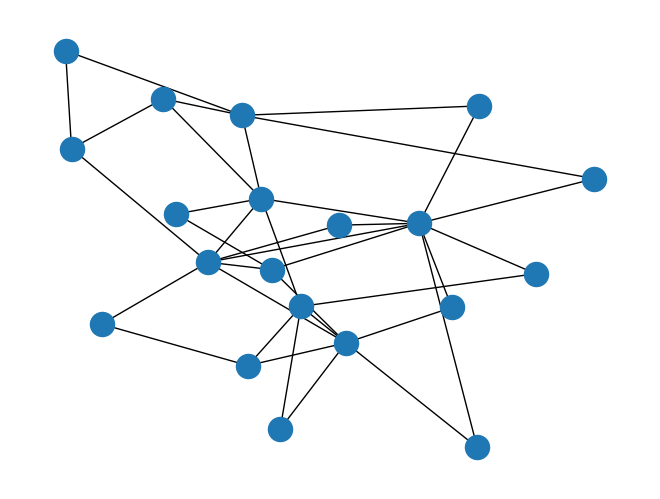

In [ ]:
nx.draw(G)

In [ ]:
problem.aspl

832.2658834326184

In [ ]:
problem.solutions[0].evaluate()

765.9869801657721

In [ ]:
problem

|S|=20, k=10 with 184756 possible solutions

In [ ]:
greedy = GreedySolver()
sln2 = greedy.solve(problem)

Shortest paths created


Greedy Solver: 100%|██████████| 6/6 [00:00<00:00, 5848.44it/s]

Returning
Converting to solution
Tidying up
Done tidying
Finished Greedy Solver in 0.01 seconds. ASPL: 571.05


In [ ]:
ga = GeneticSolver(population_size=1000, maximum_iterations=1000)
ga.solve(problem)

Shortest paths created


Genetic Solver:   0%|          | 0/1000 [00:00<?, ?it/s]

Genetic Solver:  25%|██▌       | 251/1000 [00:31<01:32,  8.08it/s, Current ASPL=306.70215, Best ASPL=306.70215]


KeyboardInterrupt: 

In [ ]:
sln = greedy.solve(problem)

Shortest paths created


Greedy Solver: 100%|██████████| 50/50 [00:11<00:00,  4.33it/s]

Returning
Converting to solution
Tidying up
Done tidying
Finished Greedy Solver in 12.51 seconds. ASPL: 23.03


In [ ]:
sln.edges

<EdgeSet with 49 edges: {(16, 215, 1.9303707872798712), (210, 336, 12.899563260051947), (321, 465, 7.406692977984032), (138, 255, 3.9179483385173515), (142, 431, 9.93695501807143), (90, 452, 15.959244725112018), (33, 141, 6.770134682164673), (101, 130, 1.1005505369686217), (291, 466, 11.21390729247644), (310, 473, 1.5659327858702812), (345, 427, 23.339814558302717), (310, 480, 9.175927723842728), (233, 306, 21.810185550808903), (123, 483, 10.476037574566888), (264, 436, 31.029872241055585), (169, 173, 16.517357705263166), (91, 203, 15.681445684603359), (79, 441, 22.633753267914727), (341, 414, 3.20050767852372), (302, 477, 13.731856188485132), (221, 315, 7.857795379619179), (333, 482, 15.12708358018749), (307, 392, 15.956295481110958), (38, 171, 5.2582591253017466), (80, 246, 6.540213659210991), (255, 437, 19.223436820497906), (172, 351, 12.072020845689519), (368, 430, 3.2670754539008118), (61, 312, 16.081936610963076), (377, 491, 21.33322582059551), (60, 391, 1.8953333189102664), (52,

In [ ]:
ga = GeneticSolver(100)
ga.solve(problem)

Shortest paths created


Genetic Solver:   0%|          | 4/10000000 [00:15<10868:38:01,  3.91s/it, Current ASPL=23.33898, Best ASPL=23.290308] 


KeyboardInterrupt: 

In [ ]:
ga._best_aspl

1002.2301

In [ ]:
p, aspl = ga.evaluate()

In [ ]:
np.min(aspl)

610.7957

In [ ]:
problem.aspl

646.2526681443694

In [ ]:
greedy = GreedySolver()
greedy.solve(problem)

Shortest paths created


Greedy Solver: 100%|██████████| 5/5 [00:00<00:00, 1477.08it/s]

Returning
Converting to solution
Tidying up
Done tidying
Finished Greedy Solver in 0.02 seconds. ASPL: 529.50


In [ ]:
#solver = bruteforce.BruteForceOracleSolver()
dynamic_aspl.PartiallyDynamicAllPairsShortestPaths.VERIFY = False
solver = greedy.GreedySolver(verbose=True)

#import synthesis.edge_removal_generator as erg

with graph_db.GraphDB('../graph.db') as db:
    print("Generating graph")
    graph_gen = graph_generator.RandomGraphGenerator(200)
    G = next(graph_gen)
    print("Weighting graph")
    weighter = graph_generator.UniformWeighter(0, 1000)
    weighter.weight_graph(G)
    #weighter = None
    print("Writing graph to db")
    db.write_graph(G)
    print("Generating problems...")
    for problem in eag.generate_problems_with_solutions2(G, weighter):
        print(f"Created Problem {problem}")
        db.write_problem(problem)

Generating graph
Weighting graph
Writing graph to db
Converting edges to str
51
Generating problems...
Making weights
DONE W
Created Problem |S|=3455, k=10 with 65925856357875092601263892145 possible solutions
Converting edges to str
51
Making weights
DONE W
Created Problem |S|=15546, k=5 with 7561930524056765604 possible solutions
Converting edges to str
51
Making weights
DONE W
Created Problem |S|=2619, k=3 with 2990595069 possible solutions
Converting edges to str
51
Making weights
DONE W
Created Problem |S|=4858, k=4 with 23178337617470 possible solutions
Converting edges to str
51
Making weights
DONE W
Created Problem |S|=2596, k=6 with 422653483317116304 possible solutions
Converting edges to str
51
Making weights
DONE W
Created Problem |S|=1571, k=14 with 6037114456204278393704634638325480 possible solutions
Converting edges to str
51
Making weights
DONE W
Created Problem |S|=2295, k=3 with 2012004315 possible solutions
Converting edges to str
51
Making weights
DONE W
Created Pr

KeyboardInterrupt: 